In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df = pd.read_csv("KaggleV2-May-2016.csv")

In [4]:
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


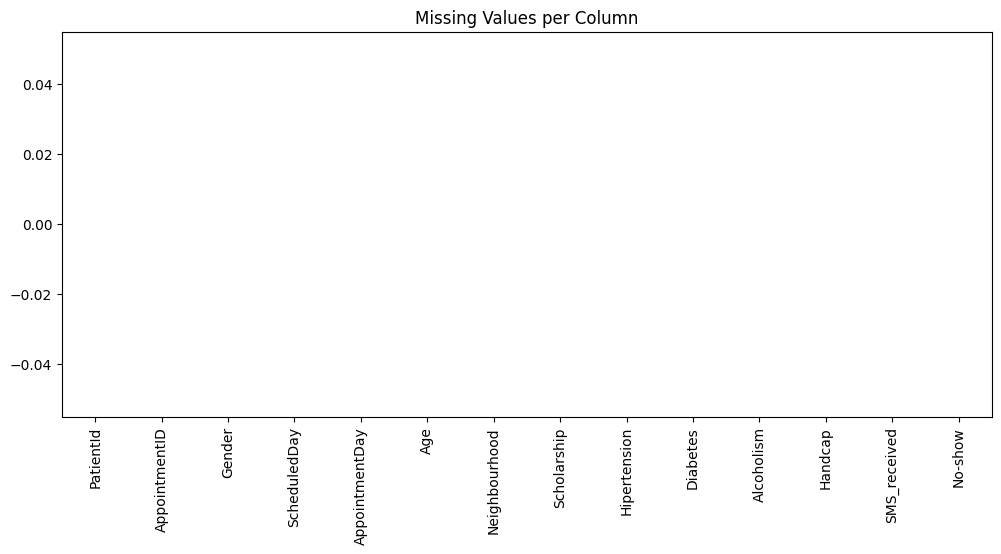

In [5]:
df.isnull().sum().plot(kind='bar', figsize=(12,5))
plt.title("Missing Values per Column")
plt.show()

In [6]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [14]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [13]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [9]:
missing_percent = df.isnull().mean() * 100
cols_to_drop = missing_percent[missing_percent > 40].index
df.drop(columns=cols_to_drop, inplace=True)

In [10]:
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


Before Cleaning:
- Missing values present
- Inconsistent data quality

After Cleaning:
- No missing values
- Dataset ready for ML

In [11]:
df.to_csv("cleaned_dataset.csv", index=False)